# Problem 1 - SPP with 4 stages

### 데이터 불러오기

In [113]:
using DelimitedFiles

In [114]:
data1, header = readdlm("problem1.csv", ',', header = true, Int)
data1

9×3 Matrix{Int64}:
 1  2  9
 1  3  6
 1  4  7
 2  5  5
 3  5  7
 3  6  8
 4  6  6
 5  7  6
 6  7  7

In [115]:
start_node = data1[:, 1]
end_node = data1[:, 2]
cost = data1[:, 3]

n_links = length(start_node)
n_nodes= maximum(end_node) #n_nodes = length(Set(vcat(start_node, end_node)))
n_nodes, n_links

(7, 9)

### 그래프 만들기

In [116]:
using Graphs, SimpleWeightedGraphs
using GraphPlot

In [117]:
function makinggraph(n_links, n_nodes, start_node, end_node, cost)
    g = SimpleWeightedGraph(n_nodes)
    for i in 1:n_links 
        add_edge!(g, start_node[i], end_node[i], cost[i])
    end
    return g
end

makinggraph (generic function with 1 method)

In [118]:
example1= makinggraph(n_links, n_nodes, start_node, end_node, cost)

{7, 9} undirected simple Int64 graph with Float64 weights

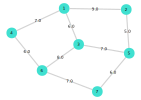

In [119]:
#visualization
edgelabel = [edge.weight for edge in edges(example1)]
gplot(example1, nodelabel=1:n_nodes, edgelabel = edgelabel)

### Dijkstra 알고리즘으로 풀기

In [120]:
result1 = Graphs.dijkstra_shortest_paths(example1, 1) #origin : 1

Graphs.DijkstraState{Float64, Int64}([0, 1, 1, 1, 3, 4, 5], [0.0, 9.0, 6.0, 7.0, 13.0, 13.0, 19.0], [Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[]], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Int64[])

In [121]:
total_cost1 = result1.dists[end]
route1 = Graphs.enumerate_paths(result1, n_nodes)

println("Path: ",route1)
println("Min cost: ", total_cost1)

Path: [1, 3, 5, 7]
Min cost: 19.0


### DP 로 풀기

In [142]:
# Function to find the shortest path using backward dynamic programming
function backward_dynamic_programming(data, n_nodes, n_links, stage)
    source = stage[1][1]
    destination = stage[end][1]
    path_length = length(stage)
    count = 0 # complexity

    # Initialize arrays to store minimum distances and predecessors
    min_costs = fill(Inf, n_nodes)
    successors = fill(0, n_nodes - 1)
    
    # Initialize the distance of the destination as 0
    min_costs[destination] = 0

    # Relax edges in reverse order (backward dynamic programming)
    for state in reverse(stage) # stage 에 대하여
        for k in state # 해당 stage의 state 에 대한 반복문
            for p in 1:n_links
                if data[p,:][2] == k # 데이터 구조 바꾸면 탐색 시간 줄일 수 있을 듯 (한계점1)
                    u, v, w = data[p,:]
                    if min_costs[u] > min_costs[v] + w # 같을 경우에 대해서도 고려해야함 - Multiple optimal solution (한계점2)
                        min_costs[u] = min_costs[v] + w
                        successors[u] = v
                        count += 1
                    end
                end
            end
        end
    end

    # To find the shortest path using predecessors array
    path = [source]
    current = source
    while length(path) != path_length
        push!(path, successors[current])
        current = successors[current]
    end 

    print("complexity: $count \n")
    return path, min_costs[source], min_costs
end

backward_dynamic_programming (generic function with 1 method)

In [123]:
# Example usage
stage= [[1],[2,3,4],[5,6],[7]]

path, optimal_value, state_value = backward_dynamic_programming(data1, n_nodes, n_links, stage)

println("Shortest path: $path")
println("Mininum cost: $optimal_value")
println("All state value: $state_value")

complexity: 7 
Shortest path: [1, 3, 5, 7]
Mininum cost: 19.0
All state value: [19.0, 11.0, 13.0, 13.0, 6.0, 7.0, 0.0]


# Problem 2 - SPP with 5 stages

In [124]:
data2, header = readdlm("problem2.csv", ',', header = true, Int)
data2

20×3 Matrix{Int64}:
 1   2  2
 1   3  4
 1   4  3
 2   5  7
 2   6  4
 2   7  6
 3   5  3
 3   6  2
 3   7  4
 4   5  4
 4   6  1
 4   7  5
 5   8  1
 5   9  4
 6   8  6
 6   9  3
 7   8  3
 7   9  3
 8  10  3
 9  10  4

In [125]:
start_node = data2[:, 1]
end_node = data2[:, 2]
cost = data2[:, 3]

n_links = length(start_node)
n_nodes= maximum(end_node)
n_nodes, n_links

(10, 20)

In [126]:
example2= makinggraph(n_links, n_nodes, start_node, end_node, cost)

{10, 20} undirected simple Int64 graph with Float64 weights

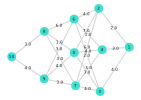

In [127]:
#visualization
edgelabel = [edge.weight for edge in edges(example2)]
gplot(example2, nodelabel=1:n_nodes, edgelabel = edgelabel)

### Dijkstra 알고리즘으로 풀기

In [128]:
result2 = Graphs.dijkstra_shortest_paths(example2, 1) #origin : 1

Graphs.DijkstraState{Float64, Int64}([0, 1, 1, 1, 4, 4, 2, 5, 6, 9], [0.0, 2.0, 4.0, 3.0, 7.0, 4.0, 8.0, 8.0, 7.0, 11.0], [Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[]], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 3.0], Int64[])

In [129]:
total_cost2 = result2.dists[end]
route2 = Graphs.enumerate_paths(result2, n_nodes)

println("Path: ",route2)
println("Min cost: ", total_cost2)

Path: [1, 4, 6, 9, 10]
Min cost: 11.0


(참고) 3 optimal path : [1 - 3 - 5 - 8 - 10], [1 - 4 - 5 - 8 - 10], [1 - 4 - 6 - 9 - 10]

### DP 로 풀기

In [131]:
# Example usage
stage= [[1],[2,3,4],[5,6,7],[8,9],[10]]

path, optimal_value, state_value = backward_dynamic_programming(data2, n_nodes, n_links, stage)

println("Shortest path: $path")
println("Mininum cost: $optimal_value")
println("All state value: $state_value")

complexity: 11 
Shortest path: [1, 3, 5, 8, 10]
Mininum cost: 11.0
All state value: [11.0, 11.0, 7.0, 8.0, 4.0, 7.0, 6.0, 3.0, 4.0, 0.0]


# Problem 3 - TSP

### 직접 풀기

In [362]:
using JuMP
import GLPK
import Random
import Plots

In [363]:
function generate_distance_matrix(n; random_seed = 1)
    rng = Random.MersenneTwister(random_seed)
    X = 100 * rand(rng, n) # x 좌표
    Y = 100 * rand(rng, n) # y 좌표
    d = [sqrt((X[i] - X[j])^2 + (Y[i] - Y[j])^2) for i in 1:n, j in 1:n] #distance
    return X, Y, d
end

n = 20
X, Y, d = generate_distance_matrix(n)

([23.603334566204694, 34.651701419196044, 31.27069683360675, 0.790928339056074, 48.86128300795012, 21.096820215853597, 95.1916339835734, 99.99046588986135, 25.166218303197184, 98.66663668987997, 55.57510873245724, 43.71079746096251, 42.471785049513144, 77.3223048457377, 28.11902322857298, 20.947237319807076, 25.137920979222493, 2.037486871266725, 28.77015122756894, 85.9512136087661], [7.695088688120899, 64.03962459899388, 87.35441302706855, 27.85824200287785, 75.13126327861701, 64.4883353942093, 7.782644396003469, 84.81854810000327, 8.56351682044918, 55.32055454580578, 46.33502459235987, 18.582130997265377, 11.198087695816717, 97.6311881619359, 5.161462067432709, 53.80295812064833, 45.56920516275036, 27.93951106725605, 17.824610354168602, 54.89828719625274], [0.0 57.417533359853884 … 11.371156651593584 78.20102282262022; 57.417533359853884 0.0 … 46.587768505328015 52.107619408284236; … ; 11.371156651593584 46.587768505328015 … 0.0 68.1478643072081; 78.20102282262022 52.107619408284236 

In [364]:
function build_tsp_model(d, n)
    model = Model(GLPK.Optimizer)
    @variable(model, x[1:n, 1:n], Bin, Symmetric)
    @objective(model, Min, sum(d .* x) / 2)
    @constraint(model, [i in 1:n], sum(x[i, :]) == 2)
    @constraint(model, [i in 1:n], x[i, i] == 0)
    return model
end

build_tsp_model (generic function with 1 method)

In [365]:
function subtour(edges::Vector{Tuple{Int,Int}}, n)
    shortest_subtour, unvisited = collect(1:n), Set(collect(1:n))
    while !isempty(unvisited)
        this_cycle, neighbors = Int[], unvisited
        while !isempty(neighbors)
            current = pop!(neighbors)
            push!(this_cycle, current)
            if length(this_cycle) > 1
                pop!(unvisited, current)
            end
            neighbors =
                [j for (i, j) in edges if i == current && j in unvisited]
        end
        if length(this_cycle) < length(shortest_subtour)
            shortest_subtour = this_cycle
        end
    end
    return shortest_subtour
end

subtour (generic function with 3 methods)

In [366]:
function selected_edges(x::Matrix{Float64}, n)
    return Tuple{Int,Int}[(i, j) for i in 1:n, j in 1:n if x[i, j] > 0.5]
end

selected_edges (generic function with 1 method)

In [367]:
subtour(x::Matrix{Float64}) = subtour(selected_edges(x, size(x, 1)), size(x, 1))
subtour(x::AbstractMatrix{VariableRef}) = subtour(value.(x))

subtour (generic function with 3 methods)

In [368]:
iterative_model = build_tsp_model(d, n)
optimize!(iterative_model)
time_iterated = solve_time(iterative_model)
cycle = subtour(iterative_model[:x])
while 1 < length(cycle) < n
    println("Found cycle of length $(length(cycle))")
    S = [(i, j) for (i, j) in Iterators.product(cycle, cycle) if i < j]
    @constraint(
        iterative_model,
        sum(iterative_model[:x][i, j] for (i, j) in S) <= length(cycle) - 1,
    )
    optimize!(iterative_model)
    global time_iterated += solve_time(iterative_model)
    global cycle = subtour(iterative_model[:x])
end

objective_value(iterative_model)

Found cycle of length 3


416.4107225079191

In [369]:
time_iterated

0.0005700588226318359

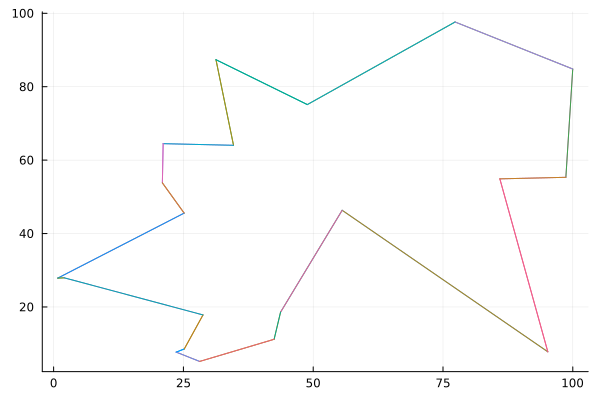

In [370]:
function plot_tour(X, Y, x)
    plot = Plots.plot()
    for (i, j) in selected_edges(x, size(x, 1))
        Plots.plot!([X[i], X[j]], [Y[i], Y[j]]; legend = false)
    end
    return plot
end

plot_tour(X, Y, value.(iterative_model[:x]))

### DP 로 풀기

In [373]:
function tsp_dynamic_programming(distance_matrix)
    n = size(distance_matrix, 1)
    num_states = 2^n
    dp = fill(Inf, n, num_states)

    # Initialize the base case
    dp[1, 1] = 0

    # Calculate the minimum distance for each state
    for mask in 1:num_states
        for u in 2:n
            if (mask & (1 << (u - 1))) != 0
                for v in 1:n
                    if v != u && (mask & (1 << (v - 1))) != 0
                        dp[u, mask] = min(dp[u, mask], dp[v, mask - (1 << (u - 1))] + distance_matrix[v, u])
                    end
                end
            end
        end
    end

    # Calculate the minimum tour length
    tour_length = Inf
    for u in 2:n
        tour_length = min(tour_length, dp[u, num_states - 1] + distance_matrix[u, 1])
    end

    return tour_length
end

tsp_dynamic_programming (generic function with 2 methods)

In [374]:
# Example usage with 10 cities
elapsed_time = @elapsed tsp_dynamic_programming(d)
println("Elapsed Time: $elapsed_time seconds")

tour_length = tsp_dynamic_programming(d)
println("Minimum tour length for 10 cities:", tour_length)

Elapsed Time: 0.885948233 seconds
Minimum tour length for 10 cities:416.41072250791916
